In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
import numpy as np
from epidemic_one_dim import Epidemic_1D
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

mpl.rcParams['figure.dpi'] = 300
cmap = mpl.colormaps['autumn']
patch_pop = 1000
number_of_patches = 50
t_max = 120
t_delta = 1 / 24

params = dict(n=patch_pop, t_max=t_max, k=number_of_patches, t_delta=t_delta)
p_a = 0.01
p_c = 0.2

In [ ]:
n_samples = 5
adventurer_props = np.array([0, 0.01, 0.02, 0.04, 0.05, 0.1, 0.125, 0.25, 0.35, 0.45, 0.5])
n_points = len(adventurer_props)
alt_series = np.zeros(shape=(n_points, n_samples, number_of_patches))
alt_epidemic = Epidemic_1D(routine_type='simple_two', **params)

for point, p_a in enumerate(adventurer_props):
    # update routine parameters
    alt_epidemic.set_routine_params(dict(p_a=p_a, p_c=p_c))
    for sample in range(n_samples):
        print(point, sample)
        alt_res = alt_epidemic.simulate()
        alt_series[point, sample, :] = (alt_res[1].sum(axis=-1)).argmax(axis=0) * t_delta


0 0


In [114]:
epi = Epidemic_1D(routine_type='simple_two', **params)
epi.set_routine_params(dict(p_1=0.5))
epi_sim = epi.simulate()
epi.set_routine_params(dict(p_a=0.001))
epi_sim_ad = epi.simulate()

Extinction event occurred, restarting


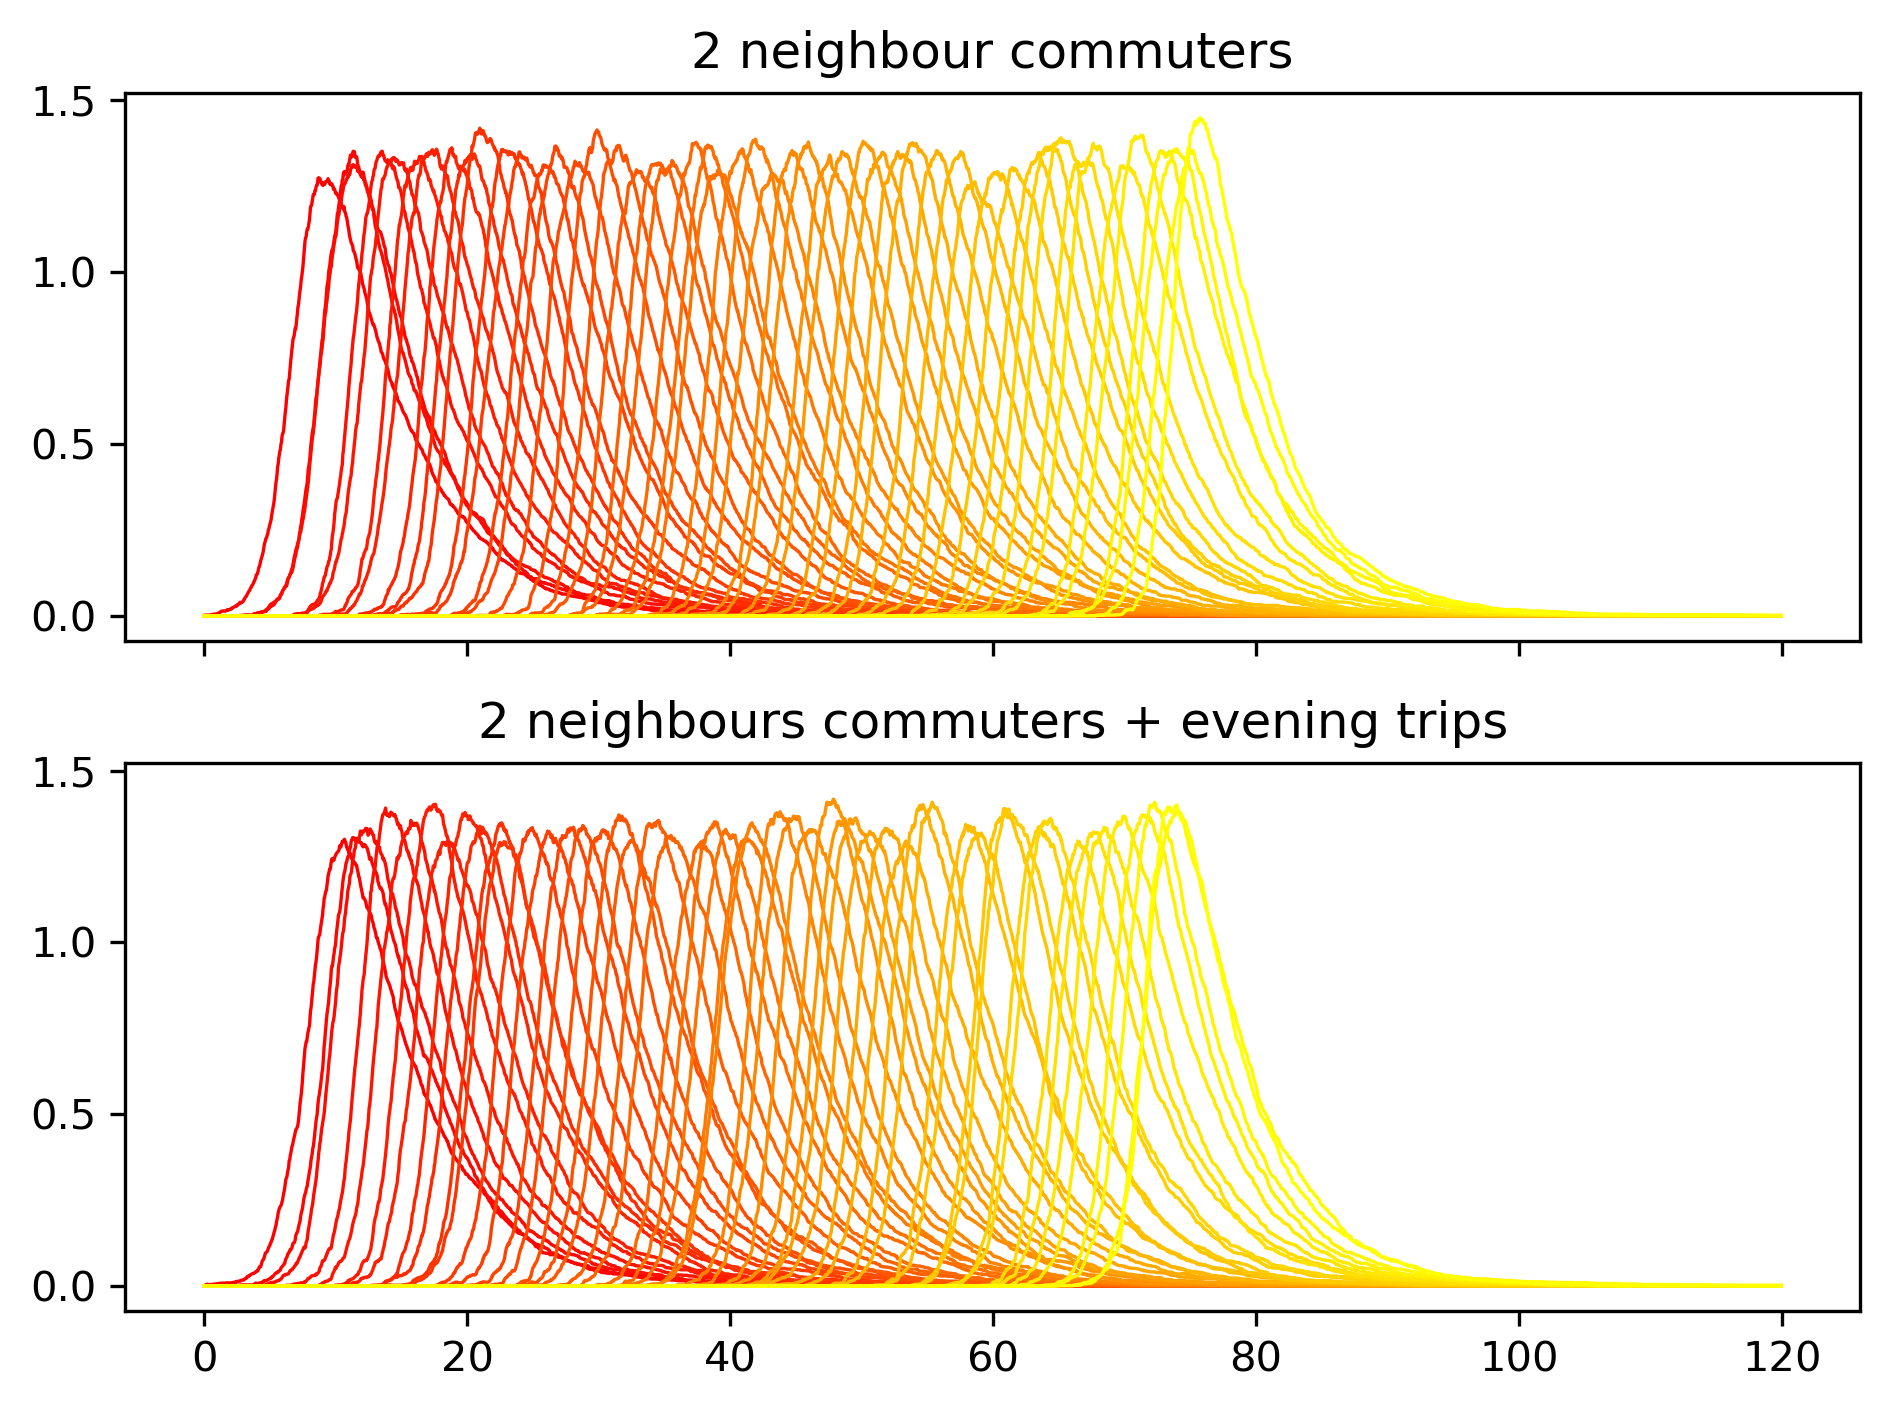

In [136]:
colors = cmap(np.linspace(0, 1, number_of_patches))
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True)
for i in range(number_of_patches):
    param = dict(color=colors[i], linewidth=0.8)
    ax[0].plot(epi_sim[-1], epi_sim[1][:, i, :].sum(axis=-1) / patch_pop, **param)
    ax[1].plot(epi_sim_ad[-1], epi_sim_ad[1][:, i, :].sum(axis=-1) / patch_pop, **param)
ax[0].set_title('2 neighbour commuters')
ax[1].set_title('2 neighbours commuters + evening trips')
fig.tight_layout()
plt.show()

In [116]:
base_series = epi_sim[1].sum(axis=-1) / patch_pop
ad_series = epi_sim_ad[1].sum(axis=-1) / patch_pop

In [125]:
alt_series.shape

(5, 5, 50)

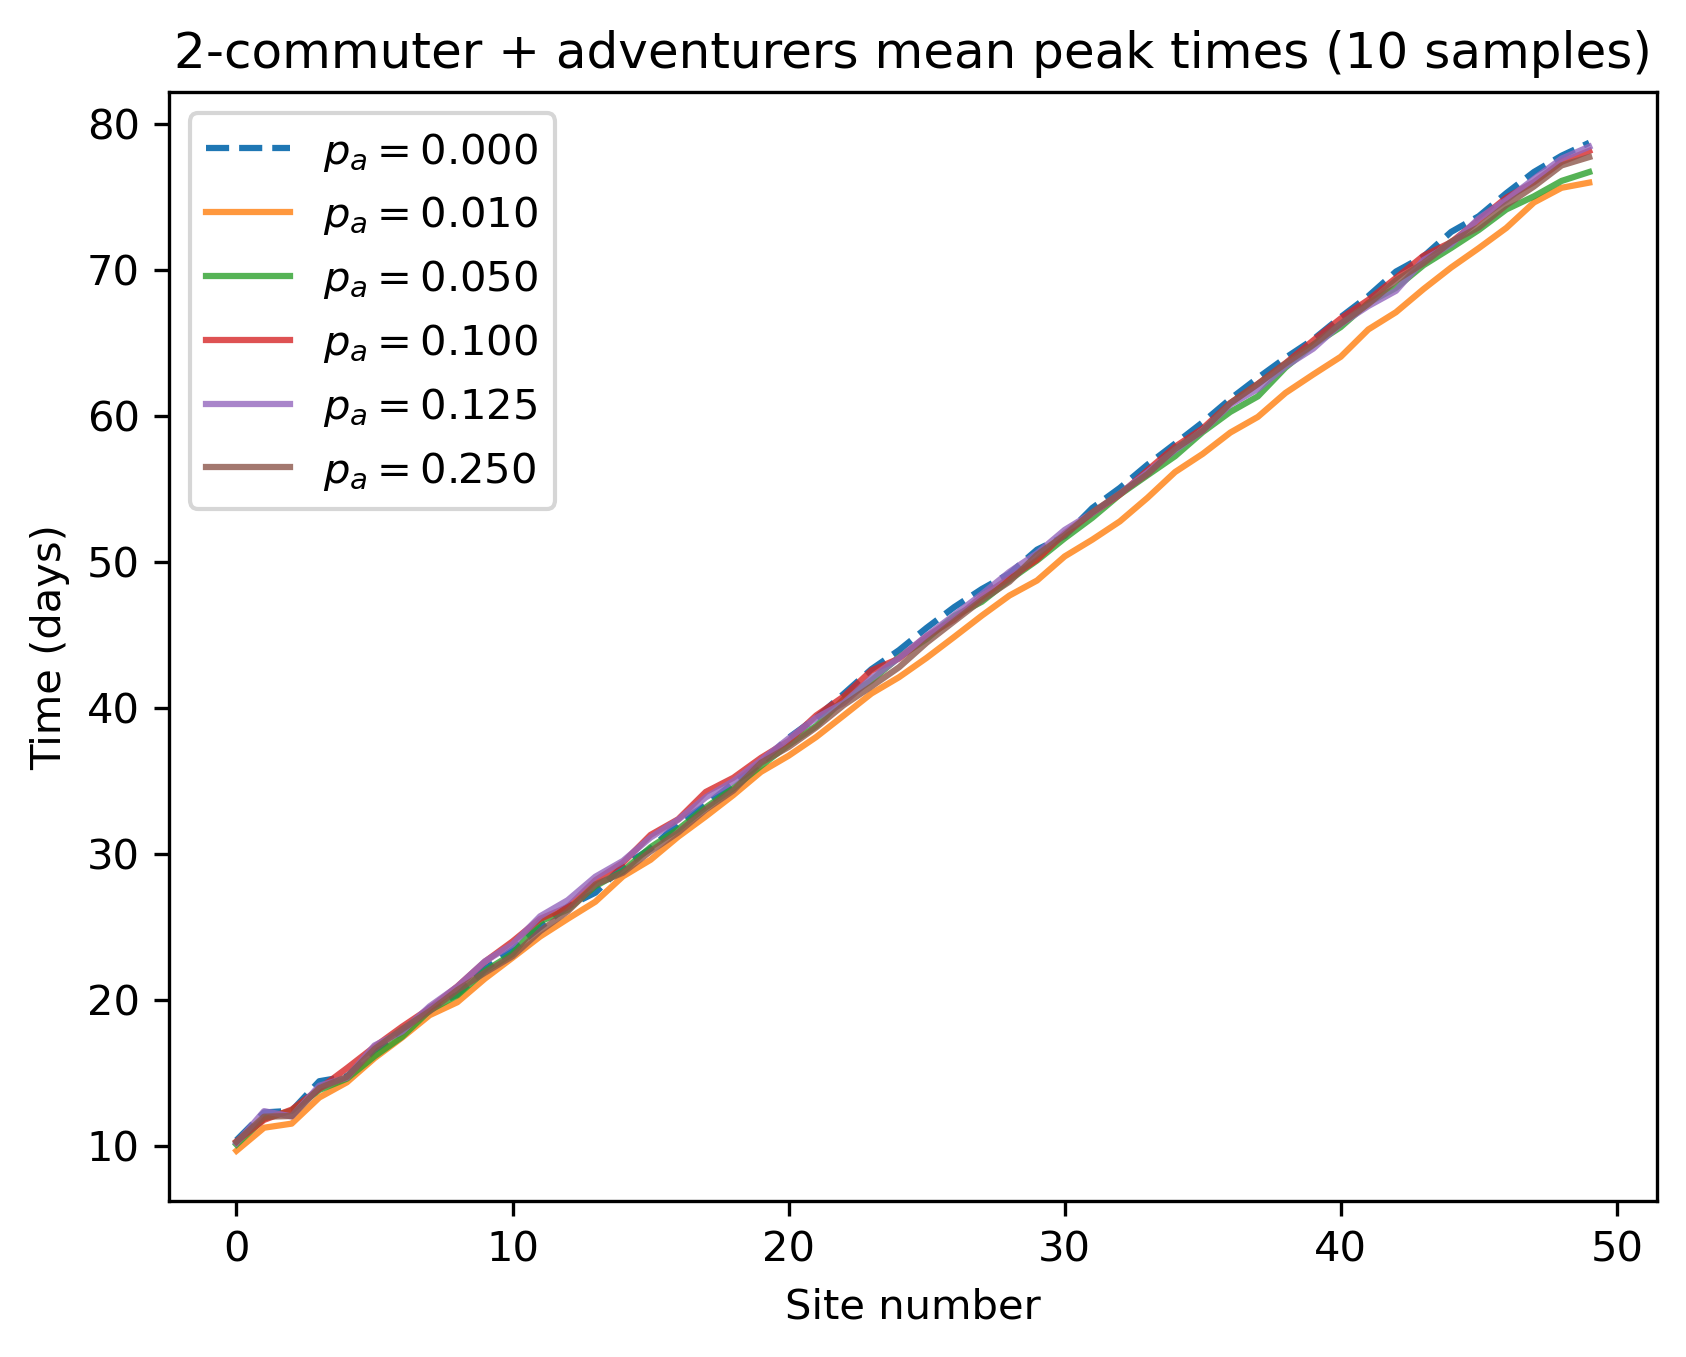

In [160]:
plt.plot(np.mean(alt_series[0, :, :], axis=0), label=f'$p_a={adventurer_props[0]:.3f}$', linestyle='--')
for i in range(1, len(adventurer_props)):
    plt.plot(np.mean(alt_series[i, :, :], axis=0), label=f'$p_a={adventurer_props[i]:.3f}$', alpha=0.8)
plt.legend()
plt.title(f'2-commuter + adventurers mean peak times ({n_samples} samples)')
plt.xlabel('Site number')
plt.ylabel('Time (days)')
plt.show()

In [ ]:
# check variance of samples, and then plot wavespeed vs p_a

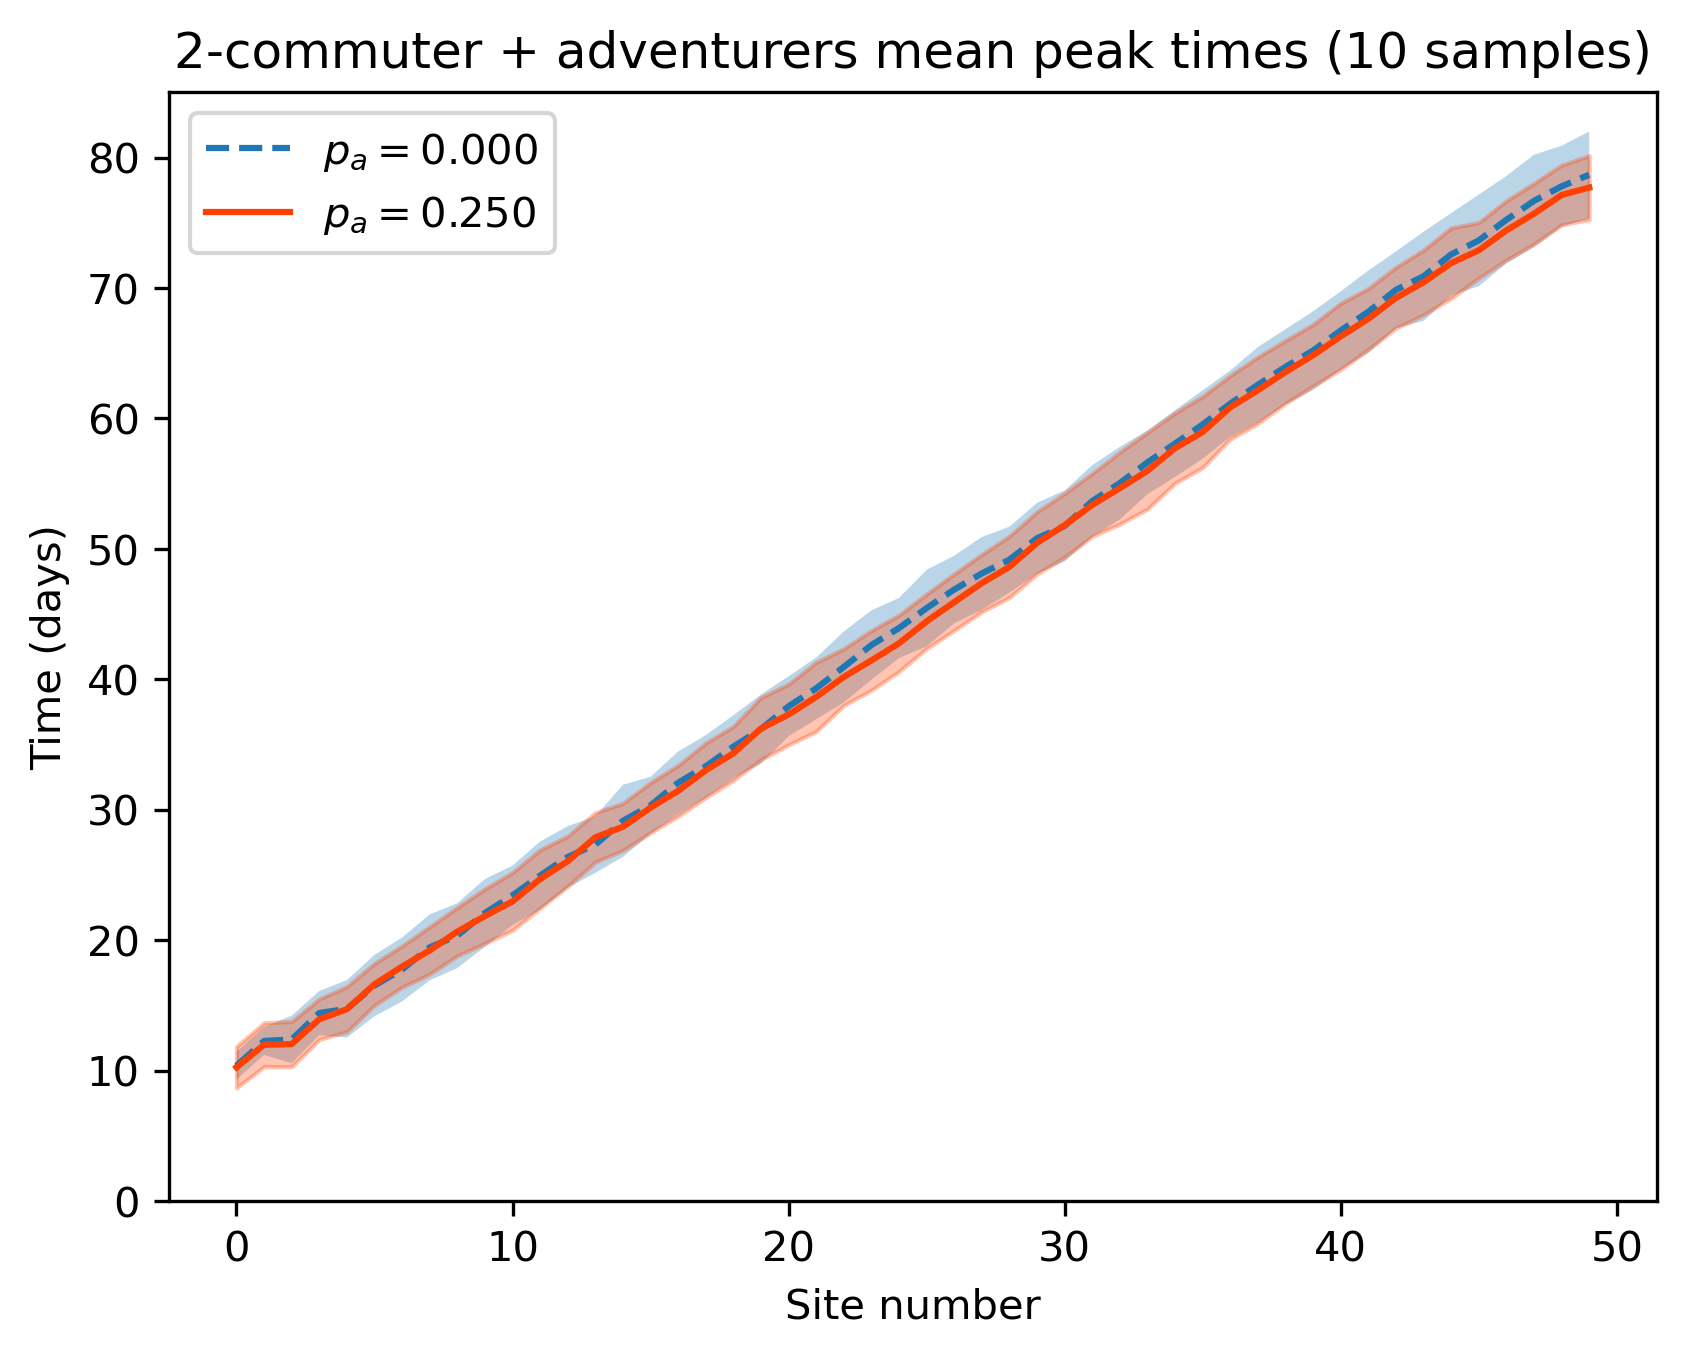

In [189]:
comparison = 5
adventure_colors = cmap(adventurer_props)
mean = np.mean(alt_series[0, :, :], axis=0)
std = np.std(alt_series[0, :, :], axis=0)
plt.plot(np.mean(alt_series[0, :, :], axis=0), label=f'$p_a={adventurer_props[0]:.3f}$', linestyle='--')
plt.fill_between(np.arange(number_of_patches), mean + std, mean - std, alpha=0.3)

alt_mean = np.mean(alt_series[comparison, :, :], axis=0)
alt_std = np.std(alt_series[comparison, :, :], axis=0)
plt.plot(np.mean(alt_series[comparison, :, :], axis=0), label=f'$p_a={adventurer_props[comparison]:.3f}$',
         color=adventure_colors[comparison])
plt.fill_between(np.arange(number_of_patches), alt_mean + alt_std, alt_mean - alt_std, alpha=0.3,
                 color=adventure_colors[comparison])

plt.legend()
plt.title(f'2-commuter + adventurers mean peak times ({n_samples} samples)')
plt.xlabel('Site number')
plt.ylabel('Time (days)')
plt.ylim(0, 85)
plt.show()

In [203]:
speeds = [stats.linregress(np.arange(number_of_patches), np.mean(alt_series[point, :, :], axis=0))[0] for point in
          range(len(adventurer_props))]

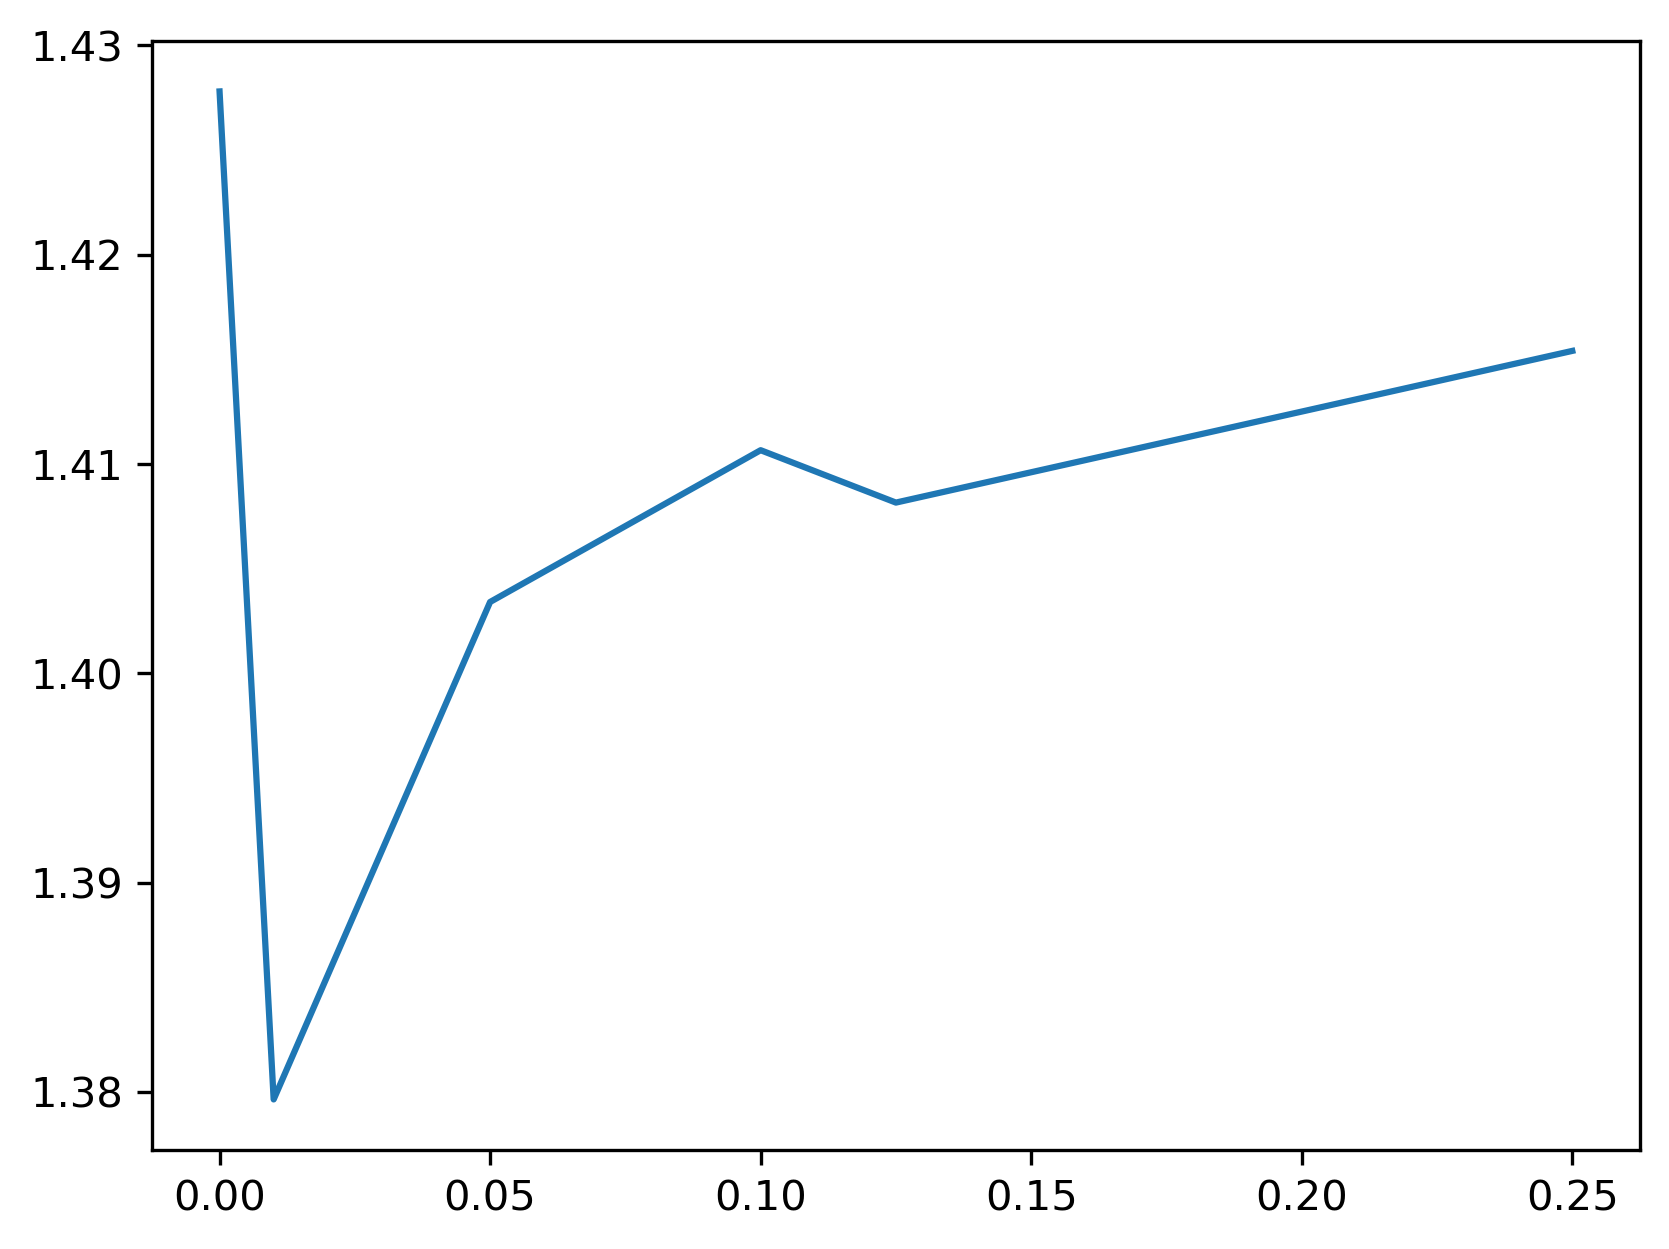

In [205]:
plt.plot(adventurer_props, speeds)
plt.show()